In [1]:

import sys
import os
sys.path.append('../')
from Codes.model import *
from Codes.utils import *

# plt.style.use('seaborn')
plt.style.use('default')

# from tqdm import tqdm
import pickle
RESULT_DIR = "../../ExptsPaper"
# os.mkdir(RESULT_DIR)
from timeit import default_timer
from sklearn.datasets import make_blobs

from tqdm.notebook import tqdm


In [2]:

def Unbalanced_Blobs(N, centers, K,D,ratio,seed):

    N1 = int(N/(ratio+1))
    N2 = N1*ratio
    split = int(K/2)

    # Sparse blobs
    X, y= make_blobs(n_samples=N1, centers=centers[0:split,:], n_features=D, cluster_std = 1.3,
                    random_state=seed)

    # Dense Blobs
    X1, y1 = make_blobs(n_samples=N2, centers=centers[split:,:], n_features=D, cluster_std = 0.7,
                    random_state=seed)

    y1 = y1+(split+1)    

    X = np.concatenate((X,X1), axis = 0)
    y = np.concatenate((y,y1), axis = 0)

    cols = [ 'X' + str(i+1) for i in range(D) ]
    df_data = pd.DataFrame(X, columns = cols)

        
    return df_data, X,y




Variation in cluster sizes with ratio = 20
 5    225
6    225
0     12
1     11
2     11
3     11
dtype: int64


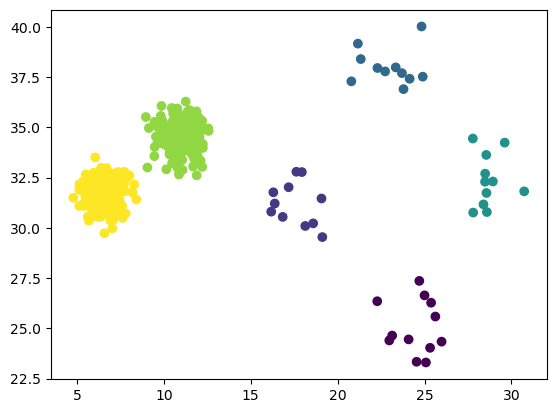

In [3]:
N = 500
D = 2
K = 8
centers = np.array( [
    [25 ,25],
 [17.86698081 ,30.93121952],
 [23.06704928, 37.70088455],
 [28.65977775, 31.81837918],
 [10.93260605, 34.54869698],
#  [ 8.07515412, 43.83882154],
#  [18.20529568, 47.88322387],
 [ 6.52889942, 31.7268767 ]] )
seed = 34
ratio = 10

df_data, X,y = Unbalanced_Blobs(N, centers, K,D,ratio, seed)
print('Variation in cluster sizes with ratio = 20\n', pd.Series(y).value_counts() )

_,ax = plt.subplots(1)
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

K = 6


## kc-Opt

MinMax model 0
# of outliers:  0
Set parameter Username
Academic license - for non-commercial use only - expires 2022-11-07
Set parameter TimeLimit to value 1800
Set parameter MIPGap to value 0.01
E:  3.3848160805337812
E:  3.3848160805337777
Optimal solution reached with Cost:  3.3848160805337777


# of constraints added:  56


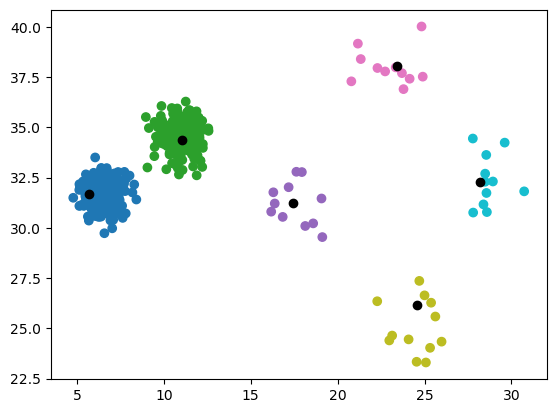

In [4]:

clus = UnsupervisedClustering(K =K , max_iter= 30, random_state=34)
clus.set_model(MinMax(initConstrCnt=6, optimalGap= 0.01, tol = 0.05, time = 30))

clus.fit(df_data )

_,ax = plt.subplots(1)

plt.scatter(X[:,0], X[:,1], c = clus.labels, cmap='tab10')
plt.scatter(clus.cluster_centers[:,0],clus.cluster_centers[:,1], c= 'black')
plt.show()

## KCenters Gonzalez

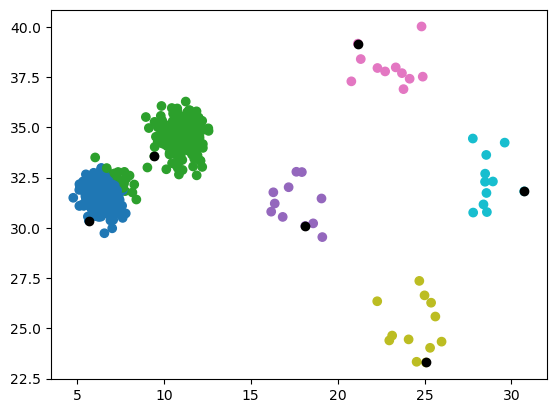

In [357]:

    
kc_gon = UnsupervisedClustering(K =K)
kc_gon.set_model(KCenters_Gon())

kc_gon.fit(df_data )


_,ax = plt.subplots(1)
kc_gon.labels
plt.scatter(X[:,0], X[:,1], c = kc_gon.labels, cmap = 'tab10')
plt.scatter(kc_gon.cluster_centers[:,0],kc_gon.cluster_centers[:,1], c= 'black')
plt.show()

## K Centers HS

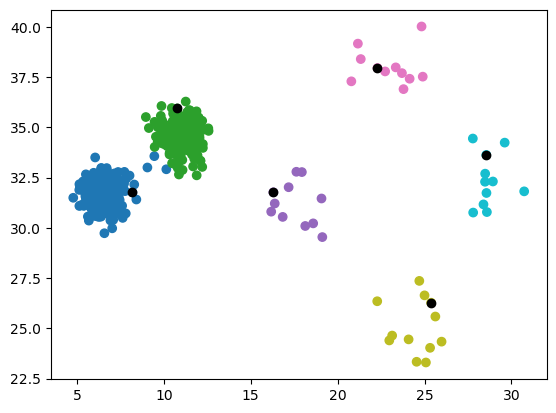

In [508]:


kc_hs = UnsupervisedClustering(K =K)
kc_hs.set_model(KCenter_HS())


kc_hs.fit(df_data )

_,ax = plt.subplots(1)

plt.scatter(X[:,0], X[:,1], c = kc_hs.labels,cmap = 'tab10' )
plt.scatter(kc_hs.cluster_centers[:,0],kc_hs.cluster_centers[:,1], c= 'black')
plt.show()

In [514]:
with open(os.path.join(RESULT_DIR, 'IntroUnbal_'+str(K)+str(D)+'_allModels.pkl'), 'wb') as outp:

    pickle.dump(kc_gon, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(kc_hs, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(clus, outp, pickle.HIGHEST_PROTOCOL)



## Plots for introduction

In [515]:
with open(os.path.join(RESULT_DIR, 'IntroUnbal_'+str(K)+str(D)+'_allModels.pkl'), 'rb') as inp:

    kc_gon = pickle.load(inp)
    kc_hs = pickle.load(inp)
    clus = pickle.load(inp)



In [20]:


col = [
    'tab:green',
    'tab:blue',
'tab:orange',
'tab:red',
'tab:purple',
'tab:brown',
'tab:pink',
'tab:gray',
'tab:olive',
'tab:cyan']


markers = ["D", "v", "<", "D",  "^", "s"]

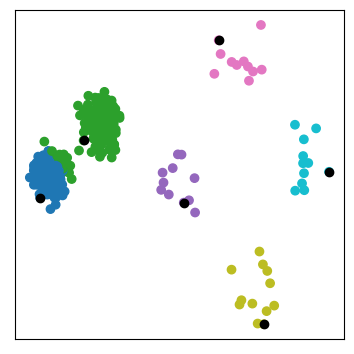

In [517]:

fig, ax = plt.subplots(1, 1, figsize = (4,4), sharey = False, sharex=False)
plt.rcParams.update({'font.size': 22})

model = kc_gon 
ax.scatter(X[:,0], X[:,1], c = model.labels, cmap = 'tab10' )
ax.scatter(model.cluster_centers[:,0],model.cluster_centers[:,1], c= 'black')

ax.set_xticks([])
ax.set_yticks([])

fig.tight_layout()

plt.savefig(f'{RESULT_DIR}/Intro1_kcgon.pdf', bbox_inches = 'tight')

plt.show()

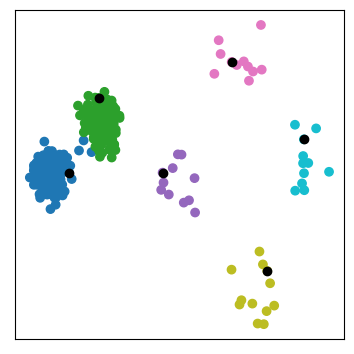

In [518]:

fig, ax = plt.subplots(1, 1, figsize = (4,4), sharey = False, sharex=False)
plt.rcParams.update({'font.size': 22})

model = kc_hs 
ax.scatter(X[:,0], X[:,1], c = model.labels, cmap = 'tab10' )
ax.scatter(model.cluster_centers[:,0],model.cluster_centers[:,1], c= 'black')

ax.set_xticks([])
ax.set_yticks([])

fig.tight_layout()

plt.savefig(f'{RESULT_DIR}/Intro1_kchs.pdf', bbox_inches = 'tight')

plt.show()

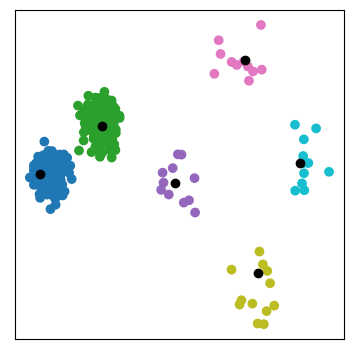

In [519]:

fig, ax = plt.subplots(1, 1, figsize = (4,4), sharey = False, sharex=False)
plt.rcParams.update({'font.size': 22})

model = clus 
ax.scatter(X[:,0], X[:,1], c = model.labels, cmap = 'tab10' )
ax.scatter(model.cluster_centers[:,0],model.cluster_centers[:,1], c= 'black')

ax.set_xticks([])
ax.set_yticks([])

fig.tight_layout()

plt.savefig(f'{RESULT_DIR}/Intro1_mm.pdf', bbox_inches = 'tight')

plt.show()